## Problem Statement

* **
Many of us have dreams what if I become the founder of a start-up and can lead it to become a big business like Microsoft, or Facebook/Amazon. But again there are many people who cheat people to run their business, probably everyone has heard about cheat-funds. This dataset contains a lot of data and the `LICENSE STATUS` column which depicts whether the person has been able to get a business license or not. Based on the given features you have to predict whether a person will be given a license or not to run his business. 

The `LICENSE STATUS` contains the following categories:
1. **`AAC`** (license was cancelled during term) 
2. **`AAI`** (license was issued) 
3. **`INQ`** (license requires inquiry) 
4. **`REA`** (license revocation has been appealed) 
5. **`REV`** (license was revoked)

* **

### Feature Description

* **

| **Sl. No.** | **Column Label** | **Column Description** |
| :--------: | :------------: | :------------------ |
| 1 | ID | A calculated unique ID for each record.| 
| 2 | LICENSE ID | An internal database ID for each record. Each license can have multiple records as it goes through renewals and other transactions. See the LICENSE NUMBER field for the number generally known to the public and used in most other data sources that refer to the license.| 
| 3 | ACCOUNT NUMBER | The account number of the business owner, which will stay consistent across that owner's licenses and can be used to find the owner in the Business Owners dataset.| 
| 4 | SITE NUMBER | An internal database ID indicating the location of this licensed business to account for business owners with more than one location.| 
| 5 | LEGAL NAME | Legal document-wise name|
| 6 | DOING BUSINESS AS NAME | Name he has given in his company| 
| 7 | ADDRESS | Address of the business office| 
| 8 | CITY | City of the business office| 
| 9 | STATE | State of the business office| 
| 10 | ZIP CODE | Zip code of the business office| 
| 11 | WARD | Ward of the business office| 
| 12 | PRECINCT | The precinct within the ward where the business is located. Note the same precinct numbers exist in multiple wards.| 
| 13 | WARD PRECINCT | The ward and precinct where the business is located. This column can be used to filter by precinct more easily across multiple wards.| 
| 14 | POLICE DISTRICT | The police district where the business is located| 
| 15 | LICENSE CODE | The code for the type of license| 
| 16 | LICENSE DESCRIPTION | Purpose for which license is taken| 
| 17 | LICENSE NUMBER | The license number known to the public and generally used in other data sources that refer to the license. This is the field most users will want for most purposes. Each license has a single license number that stays consistent throughout the lifetime of the license. By contrast, the LICENSE ID field is an internal database ID and not generally useful to external users.| 
| 18 | APPLICATION TYPE | Type of Application filed| 
| 19 | APPLICATION CREATED DATE | The date the business license application was created. RENEW type records do not have an application.| 
| 20 | APPLICATION REQUIREMENTS COMPLETE | For all application types except RENEW, this is the date all required application documents were received. For RENEW type records, this is the date the record was created.| 
| 21 | PAYMENT DATE | The day payment was completed for license| 
| 22 | CONDITION APPROVAL | This pertains to applications that contain liquor licenses. Customers may request a conditional approval prior to building out the space.| 
| 23 | LICENSE TERM START DATE | This is the date from which the license becomes valid.| 
| 24 | LICENSE TERM EXPIRATION DATE | This is the date when the license is expired and is no longer valid.| 
| 25 | LICENSE APPROVED FOR ISSUANCE | This is the date the license was ready for issuance. Licenses may not be issued if the customer owes debt to the City.| 
| 26 | DATE ISSUED | The date license was issued| 
| 27 | LICENSE STATUS CHANGE DATE | The date when license status was changed if at all it was changed| 
| 28 | SSA | Special Service Areas are local tax districts that fund expanded services and programs, to foster commercial and economic development, through a localized property tax. In other cities these areas are sometimes called Business Improvement Districts (BIDs). This portal contains a map of all Chicago SSAs| 
| 29 | LATITUDE|  Latitude Location| 
| 30 | LONGITUDE | Longitude Location| 
| 31 | LOCATION | Locality of the business| 
| 32 | LICENSE STATUS | What happened to the license:__<ol><li>AAC (license was cancelled during term)</li><li>AAI (license was issued)</li><li>INQ (license requires inquiry)</li><li>REA (license revocation has been appealed)</li><li>REV (license was revoked)</li></ol>__ |

* **

## Imports

In [12]:
import h2o

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from C:\ProgramData\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\AMITVI~1\AppData\Local\Temp\tmpfvu_1dzl
  JVM stdout: C:\Users\AMITVI~1\AppData\Local\Temp\tmpfvu_1dzl\h2o_Amit_Vikram_Raj_started_from_python.out
  JVM stderr: C:\Users\AMITVI~1\AppData\Local\Temp\tmpfvu_1dzl\h2o_Amit_Vikram_Raj_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_Amit_Vikram_Raj_3s8rjz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.412 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


## Data Loading

In [13]:
data = pd.read_csv("..\input\License_Data.csv")
data.shape

C:\Users\Amit Vikram Raj\AppData\Local\Temp\ipykernel_4356\300805768.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("..\input\License_Data.csv")


(85895, 32)

In [4]:
data.head(3)

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,LICENSE_NUMBER,APPLICATION_TYPE,APPLICATION_CREATED_DATE,APPLICATION_REQUIREMENTS_COMPLETE,PAYMENT_DATE,CONDITIONAL_APPROVAL,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


## EDA & Data Preprocessing

### 1. Analyzing Target Variable
* **

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE_ID                         85895 non-null  int64  
 2   ACCOUNT_NUMBER                     85895 non-null  int64  
 3   SITE_NUMBER                        85895 non-null  int64  
 4   LEGAL_NAME                         85895 non-null  object 
 5   DOING_BUSINESS_AS_NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP_CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

The `LICENSE STATUS` contains the following categories:
1. **`AAC`** (license was cancelled during term) 
2. **`AAI`** (license was issued) 
3. **`INQ`** (license requires inquiry) 
4. **`REA`** (license revocation has been appealed) 
5. **`REV`** (license was revoked)

In [6]:
data.LICENSE_STATUS.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE_STATUS, dtype: int64

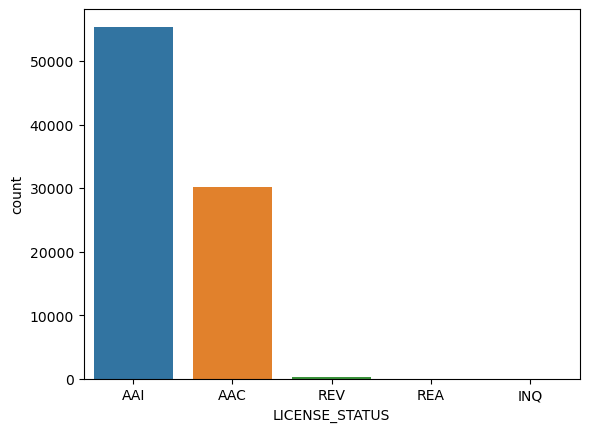

In [7]:
sns.countplot(data, x='LICENSE_STATUS');

In [8]:
data[data['LICENSE_STATUS'].isin(['REA', 'INQ'])]

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,LICENSE_NUMBER,APPLICATION_TYPE,APPLICATION_CREATED_DATE,APPLICATION_REQUIREMENTS_COMPLETE,PAYMENT_DATE,CONDITIONAL_APPROVAL,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
6284,15990-20101216,2061140,6802,1,"S. A. A. ENTERPRISES, INC.",S. A. A. FOOD & LIQUORS,2561 E 75TH ST 1,CHICAGO,IL,60649,7.0,28.0,7-28,4.0,1006,Retail Food Establishment,15990.0,RENEW,NaN,2010-10-15T00:00:00,2010-12-14T00:00:00,N,2010-12-16T00:00:00,2012-12-15T00:00:00,2010-12-14T00:00:00,2010-12-14T00:00:00,2012-08-17T00:00:00,49.0,41.758940,-87.561645,"{'latitude': '41.758939922801', 'longitude': '...",REA
50757,1331913-20030929,1331913,249850,2,TURIN BUILDERS INC,TURIN BUILDERS INC,1343 S WASHINGTON,PARK RIDGE,IL,60068,NaN,NaN,NaN,NaN,1010,Limited Business License,1331913.0,ISSUE,2003-01-22T00:00:00,2003-09-29T00:00:00,NaN,N,2003-09-29T00:00:00,2004-02-15T00:00:00,2003-07-21T00:00:00,2003-07-22T00:00:00,2003-09-29T00:00:00,NaN,NaN,NaN,NaN,INQ
59549,1963143-20100816,2041316,341709,1,SAAN & BAADA CORP.,SERENITY SPA,7222 N HARLEM AVE 1,CHICAGO,IL,60631,41.0,1.0,41-1,16.0,1524,Massage Establishment,1963143.0,RENEW,NaN,2010-06-15T00:00:00,2010-08-02T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,2010-08-02T00:00:00,2010-08-03T00:00:00,2011-06-16T00:00:00,NaN,42.012424,-87.806777,"{'latitude': '42.01242416969208', 'longitude':...",REA
80153,1331914-20030929,1331914,249850,2,TURIN BUILDERS INC,TURIN BUILDERS INC,1343 S WASHINGTON,PARK RIDGE,IL,60068,NaN,NaN,NaN,NaN,1011,Home Repair,1331914.0,ISSUE,2003-01-22T00:00:00,2003-09-29T00:00:00,NaN,N,2003-09-29T00:00:00,2004-02-15T00:00:00,2003-07-21T00:00:00,2003-07-22T00:00:00,2003-09-29T00:00:00,NaN,NaN,NaN,NaN,INQ
82318,35093-20101216,2061724,32745,1,"2953 W. BELMONT, INC.",CANOS VILLAGE,2953 W BELMONT AVE,CHICAGO,IL,60618.0,33.0,13.0,33-13,14.0,1472,Music and Dance,35093.0,RENEW,NaN,2010-10-15T00:00:00,2010-12-07T00:00:00,N,2010-12-16T00:00:00,2012-12-15T00:00:00,2010-12-07T00:00:00,2010-12-08T00:00:00,2012-12-11T00:00:00,NaN,41.939255,-87.702427,"{'latitude': '41.939255035341795', 'longitude'...",REA


In [7]:
# data[data['LICENSE_STATUS'].isin(['REA', 'INQ'])]['LEGAL_NAME'].values

In [8]:
# data[data['LEGAL_NAME'].isin(['S. A. A. ENTERPRISES, INC.', 'SAAN & BAADA CORP.', 'TURIN BUILDERS INC', '2953 W. BELMONT, INC.'])]

#### Since `REA`, `INQ` values are very low in the dataset, we can ignore them

So, Now The `LICENSE STATUS` contains the following categories:
1. **`AAC`** (license was cancelled during term) 
2. **`AAI`** (license was issued) 
3. **`REV`** (license was revoked)

In [9]:
df = data.copy()

df = df[~df['LICENSE_STATUS'].isin(['REA', 'INQ'])]

### 2. Checking Null Values, Unique Values & DataTypes
* **

In [10]:
data.isna().sum()[data.isna().sum()>0].sort_values(ascending=False)

SSA                                  76446
APPLICATION_CREATED_DATE             64660
PRECINCT                             56701
LICENSE_STATUS_CHANGE_DATE           55400
POLICE_DISTRICT                      54012
WARD                                 49701
WARD_PRECINCT                        49700
LOCATION                             47246
LONGITUDE                            47246
LATITUDE                             47246
LICENSE_APPROVED_FOR_ISSUANCE         6789
PAYMENT_DATE                          1289
LICENSE_TERM_START_DATE                228
APPLICATION_REQUIREMENTS_COMPLETE      214
ZIP_CODE                                31
LICENSE_TERM_EXPIRATION_DATE            18
LICENSE_NUMBER                           1
DOING_BUSINESS_AS_NAME                   1
dtype: int64

In [12]:
# plt.figure(figsize=(10,3))
# plt.title("Features with Null Values")
# plt.ylabel("Count")
# data.isna().sum()[data.isna().sum()>0].sort_values(ascending=False).plot(kind="bar", alpha=0.75, rot=80);

In [12]:
data.shape

(85895, 32)

In [14]:
data.dtypes

ID                                    object
LICENSE_ID                             int64
ACCOUNT_NUMBER                         int64
SITE_NUMBER                            int64
LEGAL_NAME                            object
DOING_BUSINESS_AS_NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP_CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD_PRECINCT                         object
POLICE_DISTRICT                      float64
LICENSE_CODE                           int64
LICENSE_DESCRIPTION                   object
LICENSE_NUMBER                       float64
APPLICATION_TYPE                      object
APPLICATION_CREATED_DATE              object
APPLICATION_REQUIREMENTS_COMPLETE     object
PAYMENT_DATE                          object
CONDITIONAL_APPROVAL                  object
LICENSE_TE

In [15]:
data.nunique().sort_values(ascending=False)

# The features with less # unique values can be leveraged in getting better model performance
# Whereas the features with # unique values close to data size, are probably not useful depending on their nature/type. 

ID                                   85895
LICENSE_ID                           85895
LICENSE_NUMBER                       49768
ADDRESS                              42146
DOING_BUSINESS_AS_NAME               41686
ACCOUNT_NUMBER                       38897
LEGAL_NAME                           38744
LONGITUDE                            21388
LOCATION                             21388
LATITUDE                             21386
PAYMENT_DATE                          4356
LICENSE_APPROVED_FOR_ISSUANCE         4223
DATE_ISSUED                           3498
LICENSE_STATUS_CHANGE_DATE            3152
APPLICATION_REQUIREMENTS_COMPLETE     3078
APPLICATION_CREATED_DATE              2899
LICENSE_TERM_START_DATE               2825
ZIP_CODE                              2456
WARD_PRECINCT                         2383
CITY                                  1223
LICENSE_TERM_EXPIRATION_DATE           297
SITE_NUMBER                            177
LICENSE_DESCRIPTION                    106
LICENSE_COD

- The features with less # unique values can be leveraged to get useful information
- Whereas the features with # unique values close to data size, are probably not useful depending on their nature/type. 

In [16]:
# plt.figure(figsize=(10,3))
# plt.title("Count of Unique Values in Features")
# plt.ylabel("Count")
# data.nunique()[data.nunique()<200].sort_values(ascending=False).plot(kind="bar", alpha=0.75, rot=85);

### 3. Handling Null Values & Feature Engineering
* **
Analyzing All Features One by One

In [10]:
df.columns

Index(['ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'SITE_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'LICENSE_NUMBER', 'APPLICATION_TYPE',
       'APPLICATION_CREATED_DATE', 'APPLICATION_REQUIREMENTS_COMPLETE',
       'PAYMENT_DATE', 'CONDITIONAL_APPROVAL', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_APPROVED_FOR_ISSUANCE',
       'DATE_ISSUED', 'LICENSE_STATUS_CHANGE_DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE_STATUS'],
      dtype='object')

#### 3.1 Analyzing `LEGAL_NAME` and `DOING_BUSINESS_AS_NAME` features
* **
Making a new feature called `LEGAL_BUSINESS_NAME_MATCH` to see if `LEGAL_NAME` and `DOING_BUSINESS_AS_NAME` have some similarity or not

In [11]:
df.LEGAL_NAME

0                          CARMEN CAHUE
1                   ISLA TROPICAL, INC.
2                        DJS REMODELING
3              ALL-BRY CONSTRUCTION CO.
4          MCDONOUGH MECHANICAL SERVICE
                      ...              
85890             UNITED PARCEL SERVICE
85891    EXPRESS BOARD UP SERVICE, INC.
85892                  ARAMARK SMMS LLC
85893     GENERAL NUTRITION CORPORATION
85894                 JUAN CARLOS ERAZO
Name: LEGAL_NAME, Length: 85890, dtype: object

In [12]:
df.DOING_BUSINESS_AS_NAME

0                 CLAUDIA'S BRIDAL SHOP
1                         ISLA TROPICAL
2                  DJS REMODELING, INC.
3              ALL-BRY CONSTRUCTION CO.
4          MCDONOUGH MECHANICAL SERVICE
                      ...              
85890             UNITED PARCEL SERVICE
85891    EXPRESS BOARD UP SERVICE, INC.
85892         ARAMARK FACILITY SERVICES
85893     GENERAL NUTRITION CENTER # 61
85894           CASA DE JUAN RESTAURANT
Name: DOING_BUSINESS_AS_NAME, Length: 85890, dtype: object

In [13]:
from difflib import SequenceMatcher

# ?SequenceMatcher

def similar(a, b):
    """
     Gives out a similarity score b/w two strings b/w [0, 1], 
     As a rule of thumb, ratio value over 0.6 means the sequences are close matches
    """
    return SequenceMatcher(None, a, b).ratio()

In [14]:
similar('CARMEN CAHUE', "CLAUDIA'S BRIDAL SHOP")

0.30303030303030304

In [15]:
similar("ISLA TROPICAL, INC.", "ISLA TROPICAL")

0.8125

In [16]:
# Matching if LEGAL_NAME and DOING_BUSINESS_AS_NAME is similar 

# df['LEGAL_BUSINESS_NAME_MATCH'] = df.apply(lambda x: 1 if str(x['LEGAL_NAME']).upper() in str(x['DOING_BUSINESS_AS_NAME']).upper()\
#                                                           or str(x['DOING_BUSINESS_AS_NAME']).upper() in str(x['LEGAL_NAME']).upper()
#                                                        else 0, axis=1)


# Applying similar function, Gives out a similarity score, 
# As a rule of thumb, ratio value over 0.6 means the sequences are close matches
df['LEGAL_BUSINESS_NAME_MATCH'] = df.apply(lambda x: similar(str(x['LEGAL_NAME']).upper(),
                                                             str(x['DOING_BUSINESS_AS_NAME']).upper()), 
                                           axis=1)

#### 3.2 Combining diff. categories into one in `LICENSE_DESCRIPTION` to shoten the num. of categories 
* **
Reduced from `106` total categories to `46`

In [17]:
df.LICENSE_DESCRIPTION.value_counts()

# Many LICENSE_DESCRIPTION types can be combined into a simgle category

Limited Business License                                        50077
Home Repair                                                     10632
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2320
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Motor Vehicle Repair : Engine Only (Class II)                     931
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Manufacturing Establ

In [18]:
l1 = list(df.LICENSE_DESCRIPTION.value_counts().index)

score = dict()

In [19]:
for i in l1:
    score[i] = []
    for j in l1:
        if str(i)!=str(j):
            if similar(i, j)>0.7:
                score[i].append(j)
                l1.remove(j)
    if len(score[i])==0:
        del score[i]

In [20]:
score

{'Limited Business License': ['Regulated Business License'],
 'Peddler, non-food': ['Peddler, non-food, special'],
 'Retail Food Establishment': ['Wholesale Food Establishment'],
 'Motor Vehicle Repair : Engine Only (Class II)': ['Motor Vehicle Repair: Engine/Body(Class III)',
  'Motor Vehicle Repair; Specialty(Class I)'],
 'Peddler, food (fruits and vegtables only)': ['Peddler,food - (fruits and vegetables only) - special'],
 'Manufacturing Establishments': ['Massage Establishment'],
 'Day Care Center 2 - 6 Years': ['Day Care Center Under 2 and 2 - 6 Years',
  'Day Care Center Under 2 Years'],
 'Repossessor Class B Employee': ['Repossessor Class A',
  'Expediter - Class B Employee',
  'Repossessor Class B'],
 'Tire Facilty Class I (100 - 1,000 Tires)': ['Tire Facility Class II (1,001 - 5,000 Tires)',
  'Tire Facility Class III (5,001 - More Tires)'],
 'Expediter - Class B': ['Expediter - Class A'],
 'Public Place of Amusement': ['Public Place of Amusement-TCC'],
 'Long-Term Care Facil

In [21]:
score['Repossessor Class B Employee'].remove('Expediter - Class B Employee')
score['Expediter - Class B'].append('Expediter - Class B Employee')

del score['Manufacturing Establishments']

score['Massage Establishment'] = ['Massage Therapist']

In [22]:
score['Repossessor Class B Employee'], score['Expediter - Class B']

(['Repossessor Class A', 'Repossessor Class B'],
 ['Expediter - Class A', 'Expediter - Class B Employee'])

In [23]:
score

{'Limited Business License': ['Regulated Business License'],
 'Peddler, non-food': ['Peddler, non-food, special'],
 'Retail Food Establishment': ['Wholesale Food Establishment'],
 'Motor Vehicle Repair : Engine Only (Class II)': ['Motor Vehicle Repair: Engine/Body(Class III)',
  'Motor Vehicle Repair; Specialty(Class I)'],
 'Peddler, food (fruits and vegtables only)': ['Peddler,food - (fruits and vegetables only) - special'],
 'Day Care Center 2 - 6 Years': ['Day Care Center Under 2 and 2 - 6 Years',
  'Day Care Center Under 2 Years'],
 'Repossessor Class B Employee': ['Repossessor Class A',
  'Repossessor Class B'],
 'Tire Facilty Class I (100 - 1,000 Tires)': ['Tire Facility Class II (1,001 - 5,000 Tires)',
  'Tire Facility Class III (5,001 - More Tires)'],
 'Expediter - Class B': ['Expediter - Class A',
  'Expediter - Class B Employee'],
 'Public Place of Amusement': ['Public Place of Amusement-TCC'],
 'Long-Term Care Facility': ['Animal Care Facility'],
 'Single Room Occupancy Clas

In [24]:
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Retail Food Establishment', 'Food Establishment')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Wholesale Food Establishment', 'Food Establishment')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')

# df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Public Place of Amusement')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Public Place of Amusement-TCC', 'Public Place of Amusement')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Long-Term Care Facility', 'Care Facility')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Animal Care Facility', 'Care Facility')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Single Room Occupancy Class I', 'Single Room Occupancy')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Single Room Occupancy Class II', 'Single Room Occupancy')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Airport Pushcart Liquor O'Hare - Class A", 
                                                              'Airport Pushcart Liquor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Airport Pushcart Liquor Midway - Class A', 
                                                              'Airport Pushcart Liquor')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Massage Establishment', 'Massage Services')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Massage Therapist', 'Massage Services')

In [25]:
# We reduced the unique values from 106 to 88
df.LICENSE_DESCRIPTION.value_counts()

Limited Business License                                        50077
Home Repair                                                     10632
Peddler                                                          3120
Home Occupation                                                  2809
Food Establishment                                               2447
Massage Services                                                 2062
Street Performer                                                 1889
Scavenger, Private                                               1549
Motor Vehicle                                                    1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Day Care Center     

In [26]:
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Mobile Food Dispenser','Food Dispenser')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Mobile Frozen Desserts Dispenser - Non-Motorized','Food Dispenser')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Junk Peddler', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Peddler, food (fruits and vegtables only)", 'Peddler')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tobacco Vending Machine Operator', 'Tobacco')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tobacco Dealer Wholesale', 'Tobacco')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tobacco Vending, Individual', 'Tobacco')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Tobacco Sampler", 'Tobacco')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Services License', 'Motor Vehicle')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Kennels and Catteries', 'Pet Shop')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Retail Food Est.-Supplemental License for Dog-Friendly Areas', 'Food Establishment')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Riverwalk Venue Liquor License', 'Liquor License')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Caterer's Liquor License", 'Liquor License')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Caterer's Registration (Liquor)","Liquor License")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Airport Pushcart Liquor", "Liquor License")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Consumption on Premises - Incidental Activity", 'Liquor License')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Tavern", "Liquor License")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Secondhand Dealer - Children's Products", "Secondhand Dealer")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Secondhand Dealer (No Valuable Objects)", "Secondhand Dealer")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Navy Pier - Mobile", "Navy Pier Vendor")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Navy Pier Vendor (Non-Food)", "Navy Pier Vendor")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Navy Pier - Outdoor Fixed", "Navy Pier Vendor")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Explosives", "Weapons Dealer")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Laundry, Late Hour", "Late Hour")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Pawnbroker", 'Broker')

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Single Room Occupancy", "Hotel")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Raffles", 'Hotel')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Bed-And-Breakfast Establishment", 'Hotel')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Assisted Living/Shared Housing Establishment", "Hotel")
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Vacation Rental", "Hotel")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Veterinary Hospital", "Hospital")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Outdoor Patio")

df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace("Board-Up Work", "Regulated Business License")


# df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace()
# df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace()

In [27]:
# We reduced the unique values from 88 to 59
df.LICENSE_DESCRIPTION.nunique()

59

In [28]:
df.LICENSE_DESCRIPTION.value_counts()

Limited Business License               50095
Home Repair                            10639
Peddler                                 3914
Home Occupation                         2811
Food Establishment                      2463
Massage Services                        2062
Street Performer                        1889
Scavenger, Private                      1551
Motor Vehicle                           1535
Hazardous Materials                     1126
Residential Real Estate Developer       1087
Food Dispenser                           779
Automatic Amusement Device Operator      773
Day Care Center                          522
Liquor License                           493
Manufacturing Establishments             458
Broker                                   444
Electronic Equipment Repair              325
Hotel                                    309
Repossessor                              306
Expediter                                221
Tire Facilty                             194
Package Go

In [29]:
# df[df['LICENSE_DESCRIPTION']=='Explosives, Certificate of Fitness'] 
# These are for fire department people 

In [30]:
df.LICENSE_DESCRIPTION.value_counts()[df.LICENSE_DESCRIPTION.value_counts()<10].index

Index(['Explosives, Certificate of Fitness', 'Humane Society',
       'Produce Merchant', 'Valet Parking Operator', 'Weapons Dealer',
       'Wrigley Field', 'Bicycle Messenger Service', 'Performing Arts Venue',
       'Animal Care License', 'Private Booting Operation', 'Affiliation',
       'Guard Dog Service', 'Indoor Special Event', 'Not-For-Profit Club'],
      dtype='object')

In [31]:
# Combining categories with less records into one as "Others"

for i in df.LICENSE_DESCRIPTION.value_counts()[df.LICENSE_DESCRIPTION.value_counts()<10].index:
    df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace(i, "Others")

In [32]:
df.LICENSE_DESCRIPTION.value_counts()

Limited Business License               50095
Home Repair                            10639
Peddler                                 3914
Home Occupation                         2811
Food Establishment                      2463
Massage Services                        2062
Street Performer                        1889
Scavenger, Private                      1551
Motor Vehicle                           1535
Hazardous Materials                     1126
Residential Real Estate Developer       1087
Food Dispenser                           779
Automatic Amusement Device Operator      773
Day Care Center                          522
Liquor License                           493
Manufacturing Establishments             458
Broker                                   444
Electronic Equipment Repair              325
Hotel                                    309
Repossessor                              306
Expediter                                221
Tire Facilty                             194
Package Go

In [33]:
# df.LICENSE_DESCRIPTION.value_counts()

# We reduced the unique values from 59 to 46
df.LICENSE_DESCRIPTION.nunique()

46

#### 3.3 Analyzing `LEGAL_NAME` and `DOING_BUSINESS_AS_NAME` features
* **
To Derive `BUSINESS_TYPE` feature: [INC,PVT,LLC,CORP,LTD]

In [34]:
# pd.set_option('display.max_rows', 5000)
df['LEGAL_NAME']

0                          CARMEN CAHUE
1                   ISLA TROPICAL, INC.
2                        DJS REMODELING
3              ALL-BRY CONSTRUCTION CO.
4          MCDONOUGH MECHANICAL SERVICE
                      ...              
85890             UNITED PARCEL SERVICE
85891    EXPRESS BOARD UP SERVICE, INC.
85892                  ARAMARK SMMS LLC
85893     GENERAL NUTRITION CORPORATION
85894                 JUAN CARLOS ERAZO
Name: LEGAL_NAME, Length: 85890, dtype: object

In [35]:
df.DOING_BUSINESS_AS_NAME

0                 CLAUDIA'S BRIDAL SHOP
1                         ISLA TROPICAL
2                  DJS REMODELING, INC.
3              ALL-BRY CONSTRUCTION CO.
4          MCDONOUGH MECHANICAL SERVICE
                      ...              
85890             UNITED PARCEL SERVICE
85891    EXPRESS BOARD UP SERVICE, INC.
85892         ARAMARK FACILITY SERVICES
85893     GENERAL NUTRITION CENTER # 61
85894           CASA DE JUAN RESTAURANT
Name: DOING_BUSINESS_AS_NAME, Length: 85890, dtype: object

In [36]:
import re

# Creating a BUSINESS_TYPE feature using LEGAL_NAME/DOING_BUSINESS_AS_NAME

# Removing dots from business names : INC. --> INC or CO. ---> CO
df['LEGAL_NAME'] = df['LEGAL_NAME'].str.replace('.', '', regex=False)
df['DOING_BUSINESS_AS_NAME'] = df['DOING_BUSINESS_AS_NAME'].str.replace('.', '', regex=False)

df['BUSINESS_TYPE'] = 'PVT'  # default value 'PVT' and we will change it accordingly

df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LLC|L.L.C',flags=re.IGNORECASE,regex=True),
                               'LLC', df['BUSINESS_TYPE'])

co_pattern = "^(?!.*\\b(INC|LLC|LIMITED)\\b)(?=.*\\b(CO|CORP|CORPORATION)\\b).+$"
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains(co_pattern,regex=True,flags=re.IGNORECASE),
                               'CORP', df['BUSINESS_TYPE'])

ltd_pattern = "^(?!.*\\b(INC|LLC)\\b)(?=.*\\b(LTD|LIMITED)\\b).+$"
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains(ltd_pattern,regex=True,flags=re.IGNORECASE),
                               'LTD', df['BUSINESS_TYPE'])

df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains("INC|INCORPORATED",flags=re.IGNORECASE,regex=True),
                               'INC', df['BUSINESS_TYPE'])

C:\Users\Amit Vikram Raj\AppData\Local\Temp\ipykernel_1376\4115818743.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains(co_pattern,regex=True,flags=re.IGNORECASE),
C:\Users\Amit Vikram Raj\AppData\Local\Temp\ipykernel_1376\4115818743.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains(ltd_pattern,regex=True,flags=re.IGNORECASE),


In [37]:
df.BUSINESS_TYPE.value_counts()

INC     37352
PVT     34524
LLC      6316
CORP     6261
LTD      1437
Name: BUSINESS_TYPE, dtype: int64

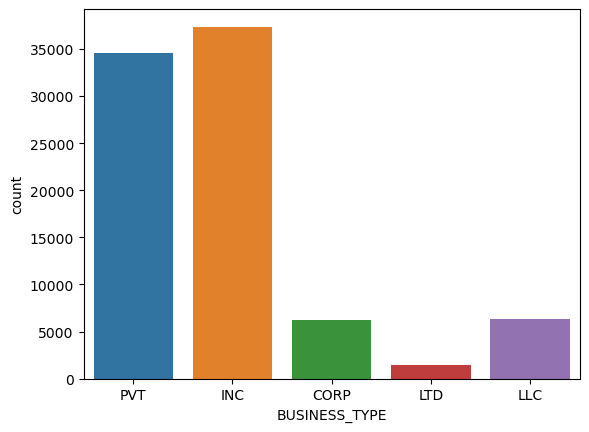

In [38]:
sns.countplot(data=df, x='BUSINESS_TYPE');

#### 3.4 Analyzing ['ZIP_CODE', 'APPLICATION_TYPE', 'SSA']
* **
New Feature derived: **'IS_ZIP_CODE_PRESENT'**

In [39]:
df.columns

Index(['ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'SITE_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'LICENSE_NUMBER', 'APPLICATION_TYPE',
       'APPLICATION_CREATED_DATE', 'APPLICATION_REQUIREMENTS_COMPLETE',
       'PAYMENT_DATE', 'CONDITIONAL_APPROVAL', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_APPROVED_FOR_ISSUANCE',
       'DATE_ISSUED', 'LICENSE_STATUS_CHANGE_DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE_STATUS', 'LEGAL_BUSINESS_NAME_MATCH',
       'BUSINESS_TYPE'],
      dtype='object')

In [40]:
df.CITY.nunique(), df.CITY.isna().sum()

(1223, 0)

In [41]:
df.STATE.nunique(), df.STATE.isna().sum()

(54, 0)

In [42]:
df.ZIP_CODE.nunique(), df.ZIP_CODE.isna().sum()

(2456, 31)

In [43]:
def convert_zipcodes_to_int(x):
    x = str(x)
    if x.endswith('.0'):
        return int(x.split('.')[0])
    if x.isnumeric():
        return int(x)
    if x=='-1':
        return -1
    
    return -1

In [44]:
# df.ZIP_CODE.value_counts()
df['ZIP_CODE'].fillna(-1, inplace=True)

# Some Zip Codes have string values in them, we'll be replacing them with -1
df['ZIP_CODE'] = df['ZIP_CODE'].apply(lambda x: convert_zipcodes_to_int(x))

df['IS_ZIP_CODE_PRESENT'] = df.apply(lambda x: 1 if x['ZIP_CODE']!=-1 else 0, axis=1)

In [45]:
df['IS_ZIP_CODE_PRESENT'].value_counts()

1    85837
0       53
Name: IS_ZIP_CODE_PRESENT, dtype: int64

In [46]:
# 'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE', --> Not so Useful

# df.LICENSE_NUMBER

In [47]:
df.columns

Index(['ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'SITE_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'LICENSE_NUMBER', 'APPLICATION_TYPE',
       'APPLICATION_CREATED_DATE', 'APPLICATION_REQUIREMENTS_COMPLETE',
       'PAYMENT_DATE', 'CONDITIONAL_APPROVAL', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_APPROVED_FOR_ISSUANCE',
       'DATE_ISSUED', 'LICENSE_STATUS_CHANGE_DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE_STATUS', 'LEGAL_BUSINESS_NAME_MATCH',
       'BUSINESS_TYPE', 'IS_ZIP_CODE_PRESENT'],
      dtype='object')

In [48]:
# df.nunique()
df.APPLICATION_TYPE.value_counts()

RENEW     61082
ISSUE     23396
C_LOC      1400
C_CAPA        7
C_EXPA        5
Name: APPLICATION_TYPE, dtype: int64

In [49]:
df.APPLICATION_TYPE.value_counts().isna().sum()

0

In [50]:
# df.nunique()
# df.SSA.value_counts(dropna=False)
df.SSA.nunique(), df.SSA.dtypes, df.SSA.isna().sum()

(53, dtype('float64'), 76442)

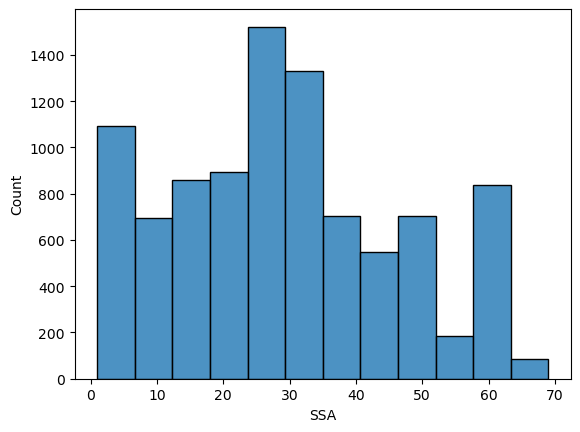

In [51]:
# df[['SSA']].plot.hist(bins=12, alpha=0.8);
sns.histplot(data=df, x='SSA', bins=12, alpha=0.8);

In [52]:
df['SSA'].fillna(-1, inplace=True)

#### 3.5 Analyzing Other Features

- 'LICENSE_TERM_START_DATE',
- 'LICENSE_STATUS_CHANGE_DATE',
- 'APPLICATION_REQUIREMENTS_COMPLETE', 
- 'CONDITIONAL_APPROVAL'

New feature derived **'HAS_LICENSE_STATUS_CHANGED'**

In [53]:
# df.columns

In [54]:
# df.nunique()
# df[['LICENSE_TERM_START_DATE','LICENSE_STATUS_CHANGE_DATE']]

In [55]:
df['LICENSE_TERM_START_DATE'] = df['LICENSE_TERM_START_DATE'].astype(np.datetime64)
df['LICENSE_STATUS_CHANGE_DATE'] = df['LICENSE_STATUS_CHANGE_DATE'].astype(np.datetime64)

In [56]:
df['LICENSE_TERM_START_DATE'].isna().sum(),\
df['LICENSE_STATUS_CHANGE_DATE'].isna().sum()

(228, 55400)

In [57]:
# Making a new feature which tells us, if the bussiness licence was changed or not

# By analyzing these two columns 'LICENSE_TERM_START_DATE','LICENSE_STATUS_CHANGE_DATE'
# We will form a new feature based called 'HAS_LICENSE_STATUS_CHANGED'

# Index of records where license status was not changed
# When both have null values simultaneously, we consider status not changed
# When only 'LICENSE_STATUS_CHANGE_DATE' has null value and not the other, we consider status not changed
status_not_changed1 = df[~df.LICENSE_TERM_START_DATE.isna() & df.LICENSE_STATUS_CHANGE_DATE.isna()].index
status_not_changed2 = df[df.LICENSE_TERM_START_DATE.isna() & df.LICENSE_STATUS_CHANGE_DATE.isna()].index

# Index of records where license status was not changed

# When both do not have null values simultaneously, we consider status changed (Both feature does not contain same values when not-null)
# When only 'LICENSE_TERM_START_DATE' has null value and not the other, we consider status changed
status_changed1 = df[~df.LICENSE_TERM_START_DATE.isna() & ~df.LICENSE_STATUS_CHANGE_DATE.isna()].index
status_changed2 = df[df.LICENSE_TERM_START_DATE.isna() & ~df.LICENSE_STATUS_CHANGE_DATE.isna()].index

df['HAS_LICENSE_STATUS_CHANGED'] = 0
    
for i in status_changed1:
    df.loc[i, 'HAS_LICENSE_STATUS_CHANGED'] = 1
    
for i in status_changed2:
    df.loc[i, 'HAS_LICENSE_STATUS_CHANGED'] = 1

In [58]:
df['PAYMENT_DATE'].fillna(-1, inplace=True)
df['IS_PAYMENT_DONE'] = df.apply(lambda x: 0 if x['PAYMENT_DATE'] == -1 
                                             else 1, axis=1)

In [59]:
# df.columns

In [60]:
df.APPLICATION_REQUIREMENTS_COMPLETE.isna().sum()

214

In [61]:
df['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(-1, inplace=True)
df['APPLICATION_REQUIREMENTS_COMPLETE'] = df.apply(lambda x: 0 if x['APPLICATION_REQUIREMENTS_COMPLETE'] == -1 
                                                               else 1, axis=1)

In [62]:
df['APPLICATION_REQUIREMENTS_COMPLETE'].value_counts()

1    85676
0      214
Name: APPLICATION_REQUIREMENTS_COMPLETE, dtype: int64

In [63]:
df.APPLICATION_REQUIREMENTS_COMPLETE.isna().sum()

0

In [64]:
df['CONDITIONAL_APPROVAL'].value_counts()

N    85872
Y       18
Name: CONDITIONAL_APPROVAL, dtype: int64

In [65]:
# df['CONDITIONAL_APPROVAL'] = df['CONDITIONAL_APPROVAL'].apply(lambda x: 0 if x=='N' 
#                                                                           else 1)
# df['CONDITIONAL_APPROVAL'].value_counts()

In [66]:
# df.groupby(['STATE', 'LICENSE_STATUS']).count()['ID']

# pd.pivot_table(df, index =['STATE'], values='APPLICATION_REQUIREMENTS_COMPLETE',
#                 columns =['LICENSE_STATUS'], aggfunc = np.sum)

In [67]:
df.STATE.value_counts()

IL    80541
IN     1749
WI      547
CA      354
MI      350
NY      218
OH      191
TX      167
MO      165
MN      141
FL      136
PA      127
GA      115
NJ      107
VA       81
CO       77
AZ       76
CT       63
MA       62
MD       60
TN       54
IA       54
WA       48
NC       45
NE       42
AL       30
KS       27
LA       26
KY       25
UT       22
OR       19
QC       18
OK       17
SC       17
NV       16
DC       14
RI       14
MS       12
SD       11
AR        9
DE        7
ID        7
MT        6
ON        5
NH        4
HI        3
NM        3
VT        2
AK        1
CN        1
WV        1
ME        1
GB        1
WY        1
Name: STATE, dtype: int64

In [68]:
df.STATE.value_counts()[df.STATE.value_counts()<10].index

Index(['AR', 'DE', 'ID', 'MT', 'ON', 'NH', 'HI', 'NM', 'VT', 'AK', 'CN', 'WV',
       'ME', 'GB', 'WY'],
      dtype='object')

In [69]:
# Combining STATES with less records into one as "Other_States"

for i in df.STATE.value_counts()[df.STATE.value_counts()<10].index:
    df['STATE'] = df['STATE'].replace(i, "Other_States")

In [70]:
df.STATE.nunique()

40

## Saving Preprocessed Data

In [71]:
df1 = df.copy()

In [72]:
df1.columns

Index(['ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'SITE_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'LICENSE_NUMBER', 'APPLICATION_TYPE',
       'APPLICATION_CREATED_DATE', 'APPLICATION_REQUIREMENTS_COMPLETE',
       'PAYMENT_DATE', 'CONDITIONAL_APPROVAL', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_APPROVED_FOR_ISSUANCE',
       'DATE_ISSUED', 'LICENSE_STATUS_CHANGE_DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE_STATUS', 'LEGAL_BUSINESS_NAME_MATCH',
       'BUSINESS_TYPE', 'IS_ZIP_CODE_PRESENT', 'HAS_LICENSE_STATUS_CHANGED',
       'IS_PAYMENT_DONE'],
      dtype='object')

In [73]:
df1.CITY.isna().sum(), df1.STATE.isna().sum()

(0, 0)

In [74]:
df1.CITY.nunique(), df1.STATE.nunique()

(1223, 40)

In [75]:
cols = ['STATE','LICENSE_DESCRIPTION', 'APPLICATION_TYPE',
        'APPLICATION_REQUIREMENTS_COMPLETE', 'CONDITIONAL_APPROVAL', 
        'SSA', 'LEGAL_BUSINESS_NAME_MATCH',
        'BUSINESS_TYPE', 'IS_ZIP_CODE_PRESENT',
        'HAS_LICENSE_STATUS_CHANGED', 'LICENSE_STATUS']

df1 = df1[cols]

In [180]:
# df1['LICENSE_STATUS'].value_counts()

In [76]:
df1.to_csv("..\output\preprocessed_License_Data.csv", index=False)
df1.to_csv("..\input\preprocessed_License_Data.csv", index=False)

# df1.to_csv("..\output\preprocessed_License_Data_all_classes.csv", index=False)
# df1.to_csv("..\input\preprocessed_License_Data_all_classes.csv", index=False)

## H2o Random Forest Model

### Loading the preprocessed data

In [77]:
# df = pd.read_csv("..\input\preprocessed_License_Data.csv")
df = pd.read_csv("../input/preprocessed_License_Data_all_classes.csv")
df.head(3)

,STATE,LICENSE_DESCRIPTION,APPLICATION_TYPE,APPLICATION_REQUIREMENTS_COMPLETE,CONDITIONAL_APPROVAL,SSA,LEGAL_BUSINESS_NAME_MATCH,BUSINESS_TYPE,IS_ZIP_CODE_PRESENT,HAS_LICENSE_STATUS_CHANGED,LICENSE_STATUS
0,IL,Limited Business License,RENEW,1,N,25.0,0.303030,PVT,1,0,AAI
1,IL,Food Dispenser,RENEW,1,N,60.0,0.812500,INC,1,1,AAC
2,IL,Home Repair,ISSUE,1,N,-1.0,0.823529,PVT,1,0,AAI


In [78]:
df.isna().sum()

STATE                                0
LICENSE_DESCRIPTION                  0
APPLICATION_TYPE                     0
APPLICATION_REQUIREMENTS_COMPLETE    0
CONDITIONAL_APPROVAL                 0
SSA                                  0
LEGAL_BUSINESS_NAME_MATCH            0
BUSINESS_TYPE                        0
IS_ZIP_CODE_PRESENT                  0
HAS_LICENSE_STATUS_CHANGED           0
LICENSE_STATUS                       0
dtype: int64

### Train-Test Split

#### Creating a H2O Frame

H2OFrame is similar to pandas’ DataFrame, or R’s data.frame. One of the critical distinction is that the data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus H2OFrame represents a mere handle to that data.

In [79]:
# train, test = train_test_split(df, test_size=0.2, random_state=42)

X, y = df.drop(['LICENSE_STATUS'], axis=1), df['LICENSE_STATUS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42, stratify=y)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.shape, test.shape

((68716, 11), (17179, 11))

In [80]:
# Creating a H2O Frame

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

type(train)
# train.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


h2o.frame.H2OFrame

### Creating a RandomForest Model using H2O
* **

In [81]:
# Creating a RandomForest Model
h2o_rf = h2o.estimators.H2ORandomForestEstimator(ntrees=50, 
                                                 balance_classes=True, # max_after_balance_size=0.85,
                                                 seed=42)

In [82]:
features = ['STATE','LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'APPLICATION_REQUIREMENTS_COMPLETE',
            'CONDITIONAL_APPROVAL', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 'BUSINESS_TYPE',
            'IS_ZIP_CODE_PRESENT', 'HAS_LICENSE_STATUS_CHANGED']

target_feature =  'LICENSE_STATUS'

h2o_rf.train(x=features, y=target_feature, 
             training_frame=train, validation_frame=test)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1684634243402_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 250                         616281                 1            20           12.524        2             615           178.264

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.48188514820266304
RMSE: 0.6941794783790882
LogLoss: 1.9737609007529602
Mean Per-Class Error: 0.5682574899270705
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
AAC     AAI    INQ    REA    REV    Error        Rate
------  -----  -----  -----  -----  -----------  -----------------
44366   0      0      0      1      2.25393e-05  1 / 44,367
0       44320  0      0      0      0            0 / 44,320
44319   1      0      0      0      1            44,320 / 44,320
40664   2770   0      867    19     0.980438     43,453 / 44,320
38067   84     0      0      6168   0.860827     38,151 / 44,319
167416  47175  0      867    6188   0.568136     125,925 / 221,646

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.431864
2    0.822262
3    0.961768
4    1
5    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.0034166287684831063
RMSE: 0.058451935540947714
LogLoss: 0.02278263644740996
Mean Per-Class Error: 0.4
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
AAC    AAI    INQ    REA    REV    Error       Rate
-----  -----  -----  -----  -----  ----------  -----------
6040   0      0      0      0      0           0 / 6,040
0      11080  0      0      0      0           0 / 11,080
0      0      0      0      0      nan         0 / 0
1      0      0      0      0      1           1 / 1
58     0      0      0      0      1           58 / 58
6099   11080  0      0      0      0.00343443  59 / 17,179

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.996566
2    0.999709
3    0.999942
4    0.999942
5    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2023-05-21 07:36:19  0.177 sec   0                  nan              nan                 nan                              nan             nan                nan                nan                   nan                                nan               nan
    2023-05-21 07:36:20  1.264 sec   1                  0.616602         1.74502             0.414492                         nan             nan                0.0740435          0.142327              0.00459864                

In [83]:
# h2o_rf.explain(test)

In [84]:
predictions = h2o_rf.predict(test)

predictions['actual'] = test['LICENSE_STATUS']
predictions = predictions.as_data_frame()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [85]:
predictions.head(10)

,predict,AAC,AAI,INQ,REA,REV,actual
0,AAI,0.000000,1.000000,0.000000,0.0,0.000000e+00,AAI
1,AAC,0.999771,0.000000,0.000001,0.0,2.281735e-04,AAC
2,AAI,0.000759,0.999238,0.000002,0.0,8.524535e-07,AAI
3,AAC,0.999970,0.000000,0.000006,0.0,2.390405e-05,AAC
4,AAC,0.995678,0.004048,0.000000,0.0,2.748078e-04,AAC
5,AAI,0.005378,0.994620,0.000002,0.0,0.000000e+00,AAI
6,AAC,0.998832,0.000000,0.000000,0.0,1.168343e-03,AAC
7,AAI,0.000000,1.000000,0.000000,0.0,0.000000e+00,AAI
8,AAI,0.000000,1.000000,0.000000,0.0,0.000000e+00,AAI
9,AAI,0.001143,0.998852,0.000005,0.0,0.000000e+00,AAI


In [86]:
accuracy = predictions[predictions.actual == predictions.predict].shape[0]*100/predictions.shape[0]
accuracy

99.6565574247628

In [89]:
save_path = "..\output\saved_models\h2o_models" 

h2o.save_model(model=h2o_rf, 
               path=save_path, 
               filename="random_forest_model",
               force=True)

# h2o.save_model(model=h2o_rf, path=save_path, filename="random_forest_model_all_classes")

'C:\\Users\\Amit Vikram Raj\\#Self_Learning\\#ProjectPro\\Projects\\Business-License-Status-Prediction\\output\\saved_models\\h2o_models\\random_forest_model'

In [90]:
loaded_model = h2o.load_model(path=save_path+"\\random_forest_model")
loaded_model.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,AAC,AAI,INQ,REA,REV
AAI,0,1,0,0,0
AAC,0.999771,0,1.06425e-06,0,0.000228173
AAI,0.000759162,0.999238,2.15963e-06,0,8.52453e-07
AAC,0.99997,0,6.37791e-06,0,2.39041e-05
AAC,0.995678,0.00404765,0,0,0.000274808
AAI,0.00537832,0.99462,1.54192e-06,0,0
AAC,0.998832,0,0,0,0.00116834
AAI,0,1,0,0,0
AAI,0,1,0,0,0
AAI,0.00114345,0.998852,4.97932e-06,0,0


## Deep Neural Network 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

print(tf.__version__)

2.9.3


### Data Prepprocessing for DNN Modeling

In [2]:
df = pd.read_csv("../input/preprocessed_License_Data.csv")
df.head(3)

,STATE,LICENSE_DESCRIPTION,APPLICATION_TYPE,APPLICATION_REQUIREMENTS_COMPLETE,CONDITIONAL_APPROVAL,SSA,LEGAL_BUSINESS_NAME_MATCH,BUSINESS_TYPE,IS_ZIP_CODE_PRESENT,HAS_LICENSE_STATUS_CHANGED,LICENSE_STATUS
0,IL,Limited Business License,RENEW,1,N,25.0,0.303030,PVT,1,0,AAI
1,IL,Food Dispenser,RENEW,1,N,60.0,0.812500,INC,1,1,AAC
2,IL,Home Repair,ISSUE,1,N,-1.0,0.823529,PVT,1,0,AAI


In [3]:
cols = ['STATE', 'LICENSE_DESCRIPTION', 'APPLICATION_TYPE',
        'CONDITIONAL_APPROVAL', 'BUSINESS_TYPE','LICENSE_STATUS']


final_df = pd.get_dummies(data=df, columns=cols)

In [4]:
len(final_df.columns)
# final_df.columns

108

In [5]:
final_df.columns

Index(['APPLICATION_REQUIREMENTS_COMPLETE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH',
       'IS_ZIP_CODE_PRESENT', 'HAS_LICENSE_STATUS_CHANGED', 'STATE_AL',
       'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT',
       ...
       'BUSINESS_TYPE_CORP', 'BUSINESS_TYPE_INC', 'BUSINESS_TYPE_LLC',
       'BUSINESS_TYPE_LTD', 'BUSINESS_TYPE_PVT', 'LICENSE_STATUS_AAC',
       'LICENSE_STATUS_AAI', 'LICENSE_STATUS_INQ', 'LICENSE_STATUS_REA',
       'LICENSE_STATUS_REV'],
      dtype='object', length=108)

In [6]:
target_features = ['LICENSE_STATUS_AAC', 'LICENSE_STATUS_AAI', 'LICENSE_STATUS_REV']

X = final_df.drop(target_features, axis=1)
y = final_df[target_features]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42, stratify=y)


# Converting into numpy array
X_train, X_test, y_train, y_test = X_train.values, X_test.values,\
                                   y_train.values, y_test.values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((68716, 105), (68716, 3), (17179, 105), (17179, 3))

### Creating a Neural Network Model

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

#### 1. Model_1

A three layer neural network with activation as `relu` and `softmax`

In [7]:
X_train.shape, X_train[0].shape

((68712, 63), (63,))

In [9]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = keras.Sequential([layers.InputLayer(input_shape=X_train.shape[1], name="input_layer"),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(3, activation="softmax", name="output_layer")])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [10]:
# Check the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3328      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 4,483
Trainable params: 4,483
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the model
history_1 = model_1.fit(x=X_train, y=y_train,
                        epochs=5, 
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        workers=6)

Epoch 1/5
2148/2148 [==============================] - 10s 3ms/step - loss: 0.0562 - accuracy: 0.9835 - val_loss: 0.0161 - val_accuracy: 0.9966
Epoch 2/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0167 - accuracy: 0.9966 - val_loss: 0.0151 - val_accuracy: 0.9966
Epoch 3/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0158 - accuracy: 0.9966 - val_loss: 0.0142 - val_accuracy: 0.9966
Epoch 4/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.0136 - val_accuracy: 0.9966
Epoch 5/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0151 - accuracy: 0.9966 - val_loss: 0.0142 - val_accuracy: 0.9966


In [12]:
model_1.evaluate(X_test, y_test)

537/537 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9966


[0.0142049016430974, 0.9966235756874084]

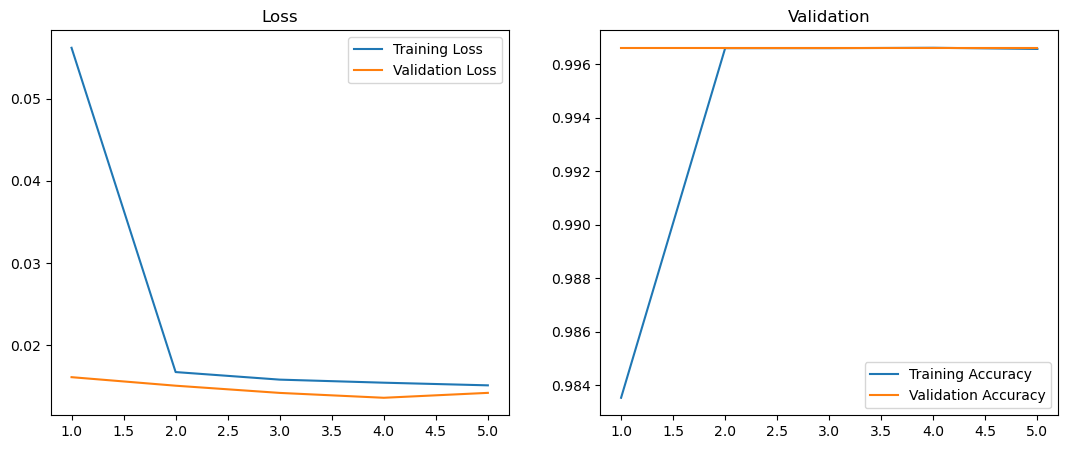

In [13]:
# importing the sys module
import sys        
 
# appending the directory of helper_functions.py in the sys.path list
sys.path.append(r"..\utils")  
sys.path.append(r"..")

# from helper_functions import plot_loss_curves
from utils.helper_functions import plot_loss_curves

plot_loss_curves(history_1)

#### 2. Model_2
Same as Model_1, lowering the learning rate

In [14]:
(X_train.shape[1])

103

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = keras.Sequential([layers.InputLayer(input_shape=X_train.shape[1]),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(3, activation="softmax")])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(X_train, y_train,
                        epochs=5,
                        batch_size=32,
                        validation_data=(X_test, y_test))

Epoch 1/5
2148/2148 [==============================] - 8s 3ms/step - loss: 0.3191 - accuracy: 0.8927 - val_loss: 0.0599 - val_accuracy: 0.9965
Epoch 2/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0343 - accuracy: 0.9963 - val_loss: 0.0237 - val_accuracy: 0.9966
Epoch 3/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0211 - accuracy: 0.9966 - val_loss: 0.0191 - val_accuracy: 0.9966
Epoch 4/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0183 - accuracy: 0.9966 - val_loss: 0.0172 - val_accuracy: 0.9966
Epoch 5/5
2148/2148 [==============================] - 7s 3ms/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.0164 - val_accuracy: 0.9966


In [19]:
model_2.evaluate(X_test, y_test)

537/537 [==============================] - 2s 3ms/step - loss: 0.0164 - accuracy: 0.9966


[0.016425497829914093, 0.9966235756874084]

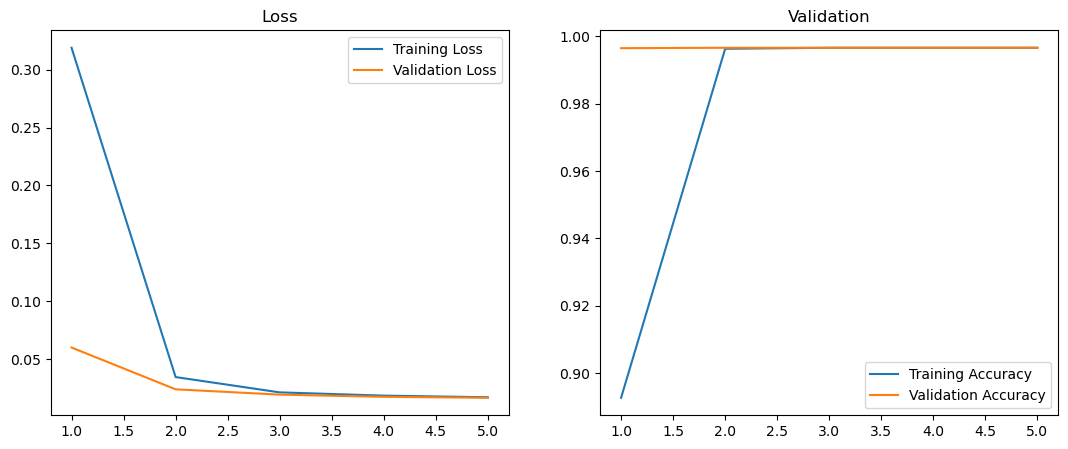

In [16]:
plot_loss_curves(history_2)

#### 3. Model_3

Increasing the learning rate 

In [17]:
# Set the random_seed
tf.random.set_seed(42)

# Create the model
model_3 = keras.Sequential([layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(3, activation="softmax")])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(x=X_train, y=y_train,
                        epochs=5, batch_size=64,
                        validation_data=(X_test, y_test))

Epoch 1/5
1074/1074 [==============================] - 4s 3ms/step - loss: 0.0334 - accuracy: 0.9913 - val_loss: 0.0153 - val_accuracy: 0.9966
Epoch 2/5
1074/1074 [==============================] - 3s 3ms/step - loss: 0.0178 - accuracy: 0.9964 - val_loss: 0.0144 - val_accuracy: 0.9966
Epoch 3/5
1074/1074 [==============================] - 4s 3ms/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.0143 - val_accuracy: 0.9966
Epoch 4/5
1074/1074 [==============================] - 3s 3ms/step - loss: 0.0170 - accuracy: 0.9964 - val_loss: 0.0143 - val_accuracy: 0.9966
Epoch 5/5
1074/1074 [==============================] - 3s 3ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.0143 - val_accuracy: 0.9966


In [20]:
model_3.evaluate(X_test, y_test)

537/537 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9966


[0.014320588670670986, 0.9966235756874084]

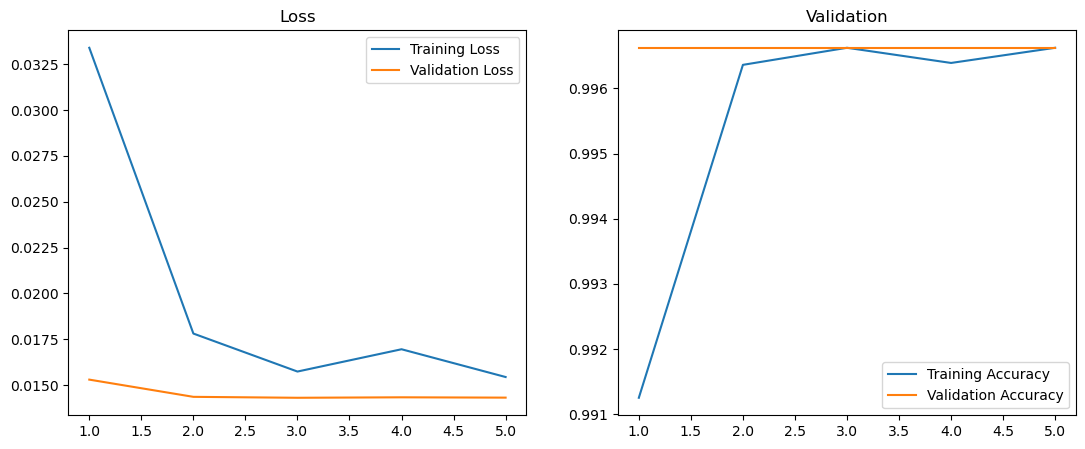

In [21]:
plot_loss_curves(history_3)

# Model is slightly over-fitting

### Saving Model_2

In [30]:
save_path = r"..\output\saved_models\neural_network_models\dnn_model.h5" 
model_2.save(filepath=save_path)
print("Model Saved!")

Model Saved!


In [31]:
model_weight_save_path = r"..\output\saved_models\neural_network_models\dnn_model_weights.h5"
model_2.save_weights(model_weight_save_path)
print("Model Weights Saved!")

Model Weights Saved!


In [32]:
saved_model = tf.keras.models.load_model(save_path)
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                3328      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4,483
Trainable params: 4,483
Non-trainable params: 0
_________________________________________________________________


In [26]:
saved_model.evaluate(X_test, y_test)

537/537 [==============================] - 2s 3ms/step - loss: 0.0164 - accuracy: 0.9966


[0.016425497829914093, 0.9966235756874084]

In [33]:
saved_model_weights = model_2.load_weights(model_weight_save_path)

## Generate requirements.txt

- References:

    - [Reference-1](https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52)
    - [Reference-2](https://stackoverflow.com/questions/51503913/pipreqs-unicodedecodeerror-charmap-codec-cant-decode-byte-0x98-in-position)

- Install

    - `pip install pipreqs`
    - `pip install nbconvert`
    
- Convert your jupyter notebook to .py file

    - `jupyter nbconvert --output-dir="./reqs" --to script notebook_name.ipynb`
    - `cd reqs (Navigate to the .py file directory)`

- Run the foloowing command in .py file folder

    - `pipreqs "file_path"`
    - `pipreqs --encoding=utf8 "file_path"` (if above does not works)